<a href="https://colab.research.google.com/github/MinZhenTay/Recipe-Recommendation/blob/main/EDA_%26_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
Recipe =pd.read_csv('/Users/60197/Desktop/Research Project/FinalRecipeData.csv')

In [2]:
Recipe

,Unnamed: 0,recipe_name,ingredients,cooking_directions,nutritions
0,0,air fried raspberry brie bites,"['1 (8 ounce) round brie cheese', '1 (8 ounce)...",['\nslice the brie into squares about ½ inch t...,"[{'calories': '252'}, {'fat': '16g '}, {'carbs..."
1,1,spicy chicken jerky in the air fryer,"['2 (5 ounce) boneless chicken breasts, cut in...","['\ncombine chicken strips, marinade, and caju...","[{'calories': '54'}, {'fat': '1g '}, {'carbs':..."
2,2,air fryer scrambled eggs on the go,"[' cooking spray', '2 large eggs, beaten', ' ...",['\nlightly spray a ramekin dish with non-stic...,"[{'calories': '143'}, {'fat': '10g '}, {'carbs..."
3,3,basic air fryer hot dogs,"['4 hot dog buns', '4 hot dogs']",['\npreheat an air fryer to 400 degrees f (200...,"[{'calories': '269'}, {'fat': '15g '}, {'carbs..."
4,4,air fryer potato wedges,"['2 medium russet potatoes', '1 ½ tablespoons ...",['\npreheat an air fryer to 400 degrees f (200...,"[{'calories': '129'}, {'fat': '5g '}, {'carbs'..."
...,...,...,...,...,...
49538,45623,frozen seasoning pods,green bell pepper^red bell pepper^onion^celery...,{'directions': u'prep\n20 m\nready in\n3 h 20 ...,"{u'niacin': {u'hascompletedata': false, u'name..."
49539,45624,richard and suzannefamous spaghetti sauce,olive oil^garlic^large onion^large green bell ...,{'directions': u'cook\n25 m\nready in\n25 m\np...,"{u'niacin': {u'hascompletedata': true, u'name'..."
49540,45627,peach smoothie,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'prep\n1 m\nready in\n1 m\nin ...,"{u'niacin': {u'hascompletedata': false, u'name..."
49541,45628,double dare peaches,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'prep\n20 m\ncook\n10 m\nready...,"{u'niacin': {u'hascompletedata': true, u'name'..."


## Data Preprocessing

In [3]:
# Preprocessing "ingredients" variable

import re

# Switch all texts into lowercase
Recipe['ingredients']=Recipe['ingredients'].str.lower()

# Remove Hashtags from text
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:re.sub(r'\B#\S+',' ',str(x)))

# Remove links from text
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:re.sub(r"http\S+", " ", x))

# Remove special characters from text 
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

# Remove numbers from text
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:re.sub('[0-9]', ' ', x))

# Remove all single characters in the text
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

# Remove the twitter handlers
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:re.sub('@[^\s]+',' ',x))

# Substitute multiple spaces with single space
Recipe['ingredients']=Recipe['ingredients'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

Recipe['ingredients']

0         ounce round brie cheese ounce package phyllo ...
1         ounce boneless chicken breasts cut into strip...
2        cooking spray large eggs beaten salt and fresh...
3                                    hot dog buns hot dogs
4         medium russet potatoes ½ tablespoons olive oi...
                               ...                        
49538    green bell pepper red bell pepper onion celery...
49539    olive oil garlic large onion large green bell ...
49540    sliced peaches drained scoops vanilla ice crea...
49541    butter habanero peppers fresh peaches brown su...
49542    olive oil bulb garlic tomatoes chopped diced t...
Name: ingredients, Length: 49543, dtype: object

In [4]:
# Preprocessing "cooking_directions" variable

# Switch all texts into lowercase
Recipe['cooking_directions']=Recipe['cooking_directions'].str.lower()

# Remove Hashtags from text
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:re.sub(r'\B#\S+',' ',str(x)))

# Remove links from text
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:re.sub(r"http\S+", " ", x))

# Remove special characters from text 
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

# Remove numbers from text
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:re.sub('[0-9]', ' ', x))

# Remove all single characters in the text
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

# Remove the twitter handlers
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:re.sub('@[^\s]+',' ',x))

# Substitute multiple spaces with single space
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

Recipe['cooking_directions'][1 ]

'ncombine chicken strips marinade and cajun seasoning in resealable plastic bag refrigerate for hours to overnight nmeasure skewers to fit across the air fryer basket slightly overlapping the edge trim off excess length npreheat the air fryer to degrees degrees for minutes nthread chicken strips onto skewers leaving room in between each strip while the air fryer is preheating nair fry for hour minutes adjust cooking time as most air fryers have maximum setting of minutes rearrange the skewers during the reset time nincrease temperature to degrees degrees and air fry for an additional minutes nremove strips to paper towel lined storage container seal allow to rest overnight before serving n'

In [5]:
# Import module for word tokenization and lemmatization & stopwords removal
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\60197\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\60197\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\60197\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\60197\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
# Tokenize text in "ingredients" variable
Recipe['ingredients']=Recipe['ingredients'].apply(word_tokenize)

# Remove stop words
Recipe['ingredients'] = Recipe['ingredients'].apply(lambda x: ' '.join([lemmatizer.lemmatize(item) for item in x if item not in stop]))


In [7]:
# Tokenize text in "cooking_directions" variable
Recipe['cooking_directions']=Recipe['cooking_directions'].apply(word_tokenize)

# Remove stop words
Recipe['cooking_directions'] = Recipe['cooking_directions'].apply(lambda x: ' '.join([lemmatizer.lemmatize(item) for item in x if item not in stop]))


## Exploratory Data Analysis (EDA)

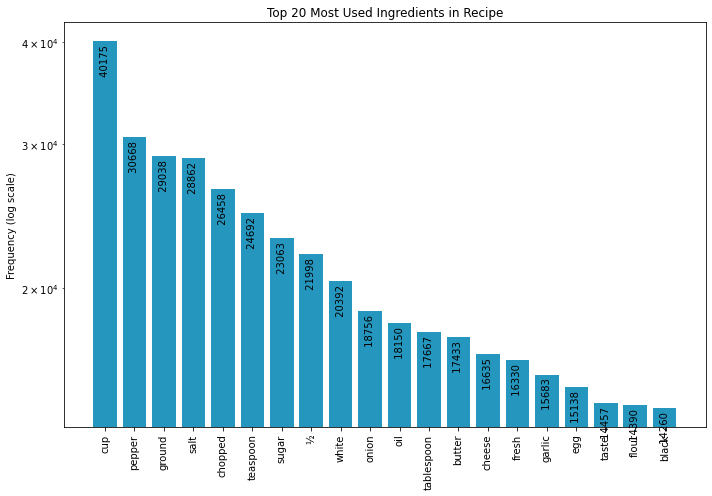

In [8]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

Counter=Counter(" ".join(Recipe['ingredients']).split())

y = [count for tag, count in Counter.most_common(20)]
x = [tag for tag, count in Counter.most_common(20)]

# most_common() produces k frequently encountered
# input values and their respective counts
most_occur = Counter.most_common(4)
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x, y, color='#2596be')
plt.title("Top 20 Most Used Ingredients in Recipe")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(Counter.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top'  , color='black' )
plt.xlim() # optionally set tighter x lims
plt.tight_layout() # change the whitespace so that all labels fit nicely
plt.show()

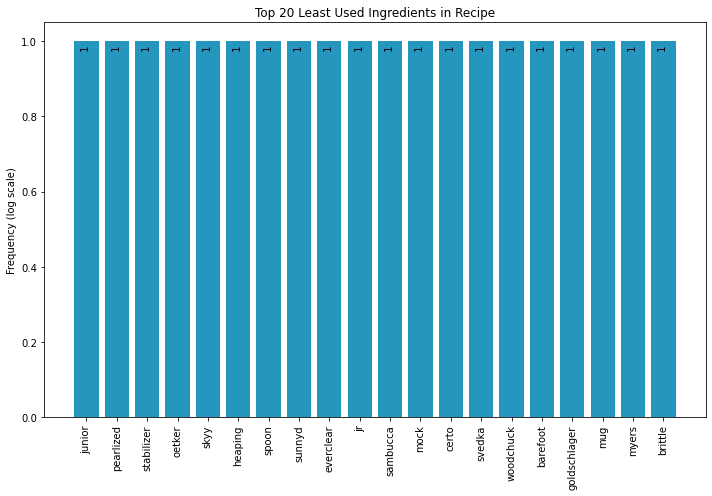

In [9]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

Counter=Counter(" ".join(Recipe['ingredients']).split())

y = [count for tag, count in Counter.most_common()[-20:]]
x = [tag for tag, count in Counter.most_common()[-20:]]

# print(x)
# most_common() produces k frequently encountered
# input values and their respective counts
most_occur = Counter.most_common(4)
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x, y, color='#2596be')
plt.title("Top 20 Least Used Ingredients in Recipe")
plt.ylabel("Frequency (log scale)")
# plt.yscale('log') # optionally set a log scale for y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(Counter.most_common()[-20:]):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top'  , color='black' )
plt.xlim() # optionally set tighter x lims
plt.tight_layout() # change the whitespace so that all labels fit nicely
plt.show()

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
def wordcloud_draw(data, color = 'black'):
    
     words = ' '.join(data)
    
     cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word
                                 and not word.startswith('@')
                                 and not word.startswith('#')
                                 and word != 'RT'
                             ])
   
     wordcloud = WordCloud(stopwords=STOPWORDS,
                       max_words=50,
                       background_color=color,
                       width=2500,
                       height=2000
                      ).generate(cleaned_word)
    
     plt.figure(1,figsize=(13, 13))
     plt.imshow(wordcloud)
     plt.axis('off')
     plt.show()


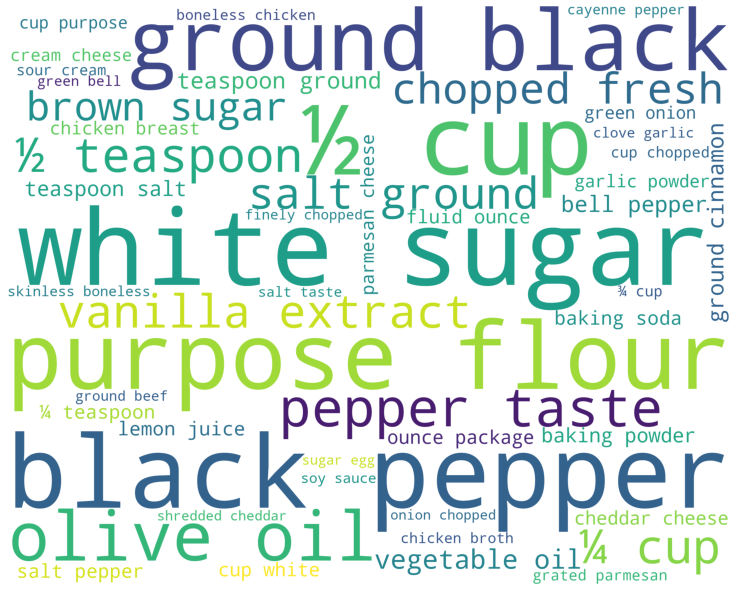

In [11]:
wordcloud_draw( Recipe['ingredients'].astype(str),'white')

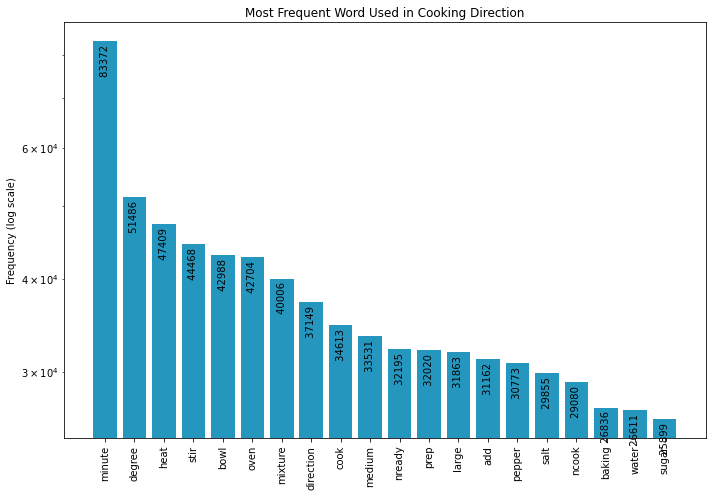

In [12]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

Counter=Counter(" ".join(Recipe['cooking_directions']).split())

y = [count for tag, count in Counter.most_common(20)]
x = [tag for tag, count in Counter.most_common(20)]

# most_common() produces k frequently encountered
# input values and their respective counts
most_occur = Counter.most_common(4)
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(x, y, color='#2596be')
plt.title("Most Frequent Word Used in Cooking Direction")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(Counter.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top'  , color='black' )
plt.xlim() # optionally set tighter x lims
plt.tight_layout() # change the whitespace so that all labels fit nicely
plt.show()

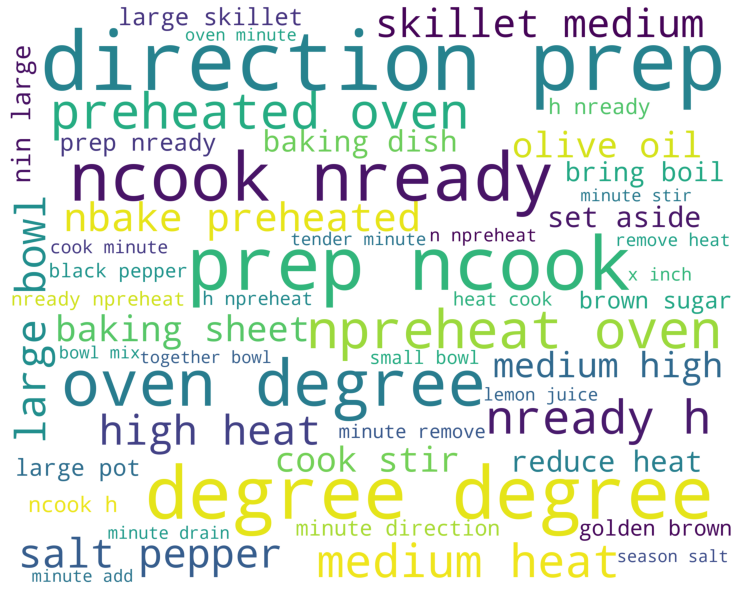

In [13]:
wordcloud_draw( Recipe['cooking_directions'].astype(str),'white')

In [14]:
# Join text for 'recipe_name', 'cooking_directions' & 'ingredients'
Recipe['fullText'] = Recipe['recipe_name'] + ' ' + Recipe['cooking_directions'] + ' ' + Recipe['ingredients']
Recipe['fullText']

0        air fried raspberry brie bites nslice brie squ...
1        spicy chicken jerky in the air fryer ncombine ...
2        air fryer scrambled eggs on the go nlightly sp...
3        basic air fryer hot dogs npreheat air fryer de...
4        air fryer potato wedges npreheat air fryer deg...
                               ...                        
49538    frozen seasoning pods direction prep nready h ...
49539    richard and suzannefamous spaghetti sauce dire...
49540    peach smoothie direction prep nready nin blend...
49541    double dare peaches direction prep ncook nread...
49542    all purpose marinara sauce direction prep ncoo...
Name: fullText, Length: 49543, dtype: object

In [15]:
# Tokenize the text
Recipe['fullText']=Recipe['fullText'].apply(word_tokenize)

# Remove stop words
Recipe['fullText'] = Recipe['fullText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(item) for item in x if item not in stop]))

In [16]:
all_text=Recipe['fullText']

In [17]:
# Create word embeddings using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase = True,
                            ngram_range = (1,1))

text_tfidf = vectorizer.fit_transform(all_text)
tfidf_words = vectorizer.get_feature_names()
#tfidf_words = vectorizer.get_feature_names_out()
print(text_tfidf.shape)
print(len(tfidf_words))

(49543, 18433)
18433


## Topic Modelling

In [18]:
# Topic modelling using LDA algorithm
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components = 50,
          n_jobs = -1,
          max_iter = 100)
text_lda = lda.fit_transform(text_tfidf)
text_lda.shape

(49543, 50)

In [19]:
# Topic modelling using NMF algorithm
from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0,
         init='nndsvdar',
         l1_ratio=0.0,
         max_iter = 100,
         n_components = 50,
         solver='cd')

text_nmf = nmf.fit_transform(text_tfidf)
text_nmf.shape

C:\Users\60197\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(49543, 50)

In [20]:
 # Function for best topic terms using cosine similarity
 # Variable dependencies:
 word_series = pd.Series(tfidf_words)

 def words_by_tops(tfidf_mat, top_mat, topic_range=(0,0), n_words=10):
     topic_word_scores = tfidf_mat.T * top_mat
     for i in range(topic_range[0],topic_range[1]):
         word_scores = pd.Series(topic_word_scores[:,i])
         word_index = word_scores.sort_values(ascending = False)[:n_words].index
         print('\nTopic #{}'.format(i))
         for index in word_index:
             print(word_series[index],'\t\t', word_scores[index])

In [21]:
# Topics score by terms using LDA
words_by_tops(text_tfidf, text_lda, (0,3), 10)


Topic #0
pepper 		 9.909232582245336
cheese 		 8.283620225693388
cup 		 8.150042408816491
minute 		 7.89328630324392
salt 		 7.857344422284112
onion 		 7.702255740435088
sugar 		 7.503052729341921
chicken 		 7.07707123872589
oil 		 6.99303768127293
degree 		 6.939236195138971

Topic #1
cheese 		 164.40573127677226
olive 		 117.29666461138669
pepper 		 104.27430831969205
oil 		 98.64652080188232
tomato 		 95.94351092642229
garlic 		 92.99513052789264
oven 		 87.31954281656073
basil 		 76.34509720158454
degree 		 75.6212715698609
parmesan 		 74.46552793971664

Topic #2
bread 		 171.6589914412294
egg 		 147.59962826411527
pepper 		 140.42132647128955
oil 		 134.01372687669388
cheese 		 125.54428380633529
crumb 		 115.84714825385502
degree 		 115.70108043194094
sauce 		 111.90434195209754
patty 		 111.3597166174565
onion 		 110.17604274376792


In [22]:
# Topics score by terms using using NMF
words_by_tops(text_tfidf, text_nmf, (0,3), 10)


Topic #0
pasta 		 12.294441097595671
cheese 		 5.285261433554919
water 		 4.149869614890714
pepper 		 4.136767790790307
cook 		 4.038375981778014
pot 		 3.6376603916244057
minute 		 3.435598526134348
tomato 		 3.3925129522769195
parmesan 		 3.3087958900346717
large 		 3.285986860086019

Topic #1
sugar 		 52.200166537389485
flour 		 48.6790823503226
baking 		 44.150813707534766
egg 		 33.37635794959449
cup 		 31.407085534376854
soda 		 31.214014582081084
degree 		 30.95343929607762
butter 		 30.15456749590288
vanilla 		 29.47312238277544
oven 		 25.29656034031958

Topic #2
chicken 		 121.81111838968175
breast 		 32.84318781970614
pepper 		 27.298159583069616
minute 		 20.734030340008328
oil 		 20.424532530504894
onion 		 20.274427649315705
sauce 		 20.08923165634244
garlic 		 19.49747135087374
heat 		 18.434027431172634
broth 		 17.221547623441396


In [23]:
# Variable dependencies:
text_series = pd.Series(all_text)

def docs_by_tops(top_mat, topic_range = (0,0), doc_range = (0,2)):
    for i in range(topic_range[0], topic_range[1]):
        topic_scores = pd.Series(top_mat[:,i])
        doc_index = topic_scores.sort_values(ascending = False)[doc_range[0]:doc_range[1]].index
        for j, index in enumerate(doc_index, doc_range[0]):
            print('Topic #{}'.format(i),
                  '\nDocument #{}'.format(j),
                  '\nTopic Score: {}\n\n'.format(topic_scores[index]),
                  text_series[index], '\n\n')

In [24]:
# Topics score by documents using LDA
docs_by_tops(text_lda,(0,3),(0,3))

Topic #0 
Document #0 
Topic Score: 0.3079138714687922

 pico de gallo avocado shrimp direction prep nready h nmix pico de gallo shrimp jalapeno pepper together bowl cover bowl plastic wrap refrigerate flavor blend hour overnight fold avocado mixture serving pico de gallo salsa cooked small shrimp jalapeno pepper avocado 


Topic #0 
Document #1 
Topic Score: 0.27467259183286113

 momkimchi egg nheat oil skillet wok medium heat cook kimchi hot oil softened minute add egg cook stir egg kimchi together egg set minute n tablespoon vegetable oil cup kimchi taste large egg beaten 


Topic #0 
Document #2 
Topic Score: 0.27350046133148403

 gourmet wasabi grit nmix grit boiling water together bowl stir wasabi sauce salt pepper n ounce packet instant grit quaker ½ cup boiling water teaspoon wasabi sauce b wasabi salt ground black pepper taste 


Topic #1 
Document #0 
Topic Score: 0.8865710143849084

 spinach stuffed portobello mushroom avocado nsoak sun dried tomato bowl hot water softened m

In [25]:
# Topics score by documents using NMF
docs_by_tops(text_nmf,(0,3),(0,3))

Topic #0 
Document #0 
Topic Score: 0.04300956115257845

 fried farfalle chip direction prep ncook nready nbring large pot lightly salted water boil add pasta cook minute al dente drain rinse pasta cold water pasta drained thoroughly water nin large skillet heat oil degree degree fry cup pasta time golden drain paper towel nin large bowl combine parmesan chili powder garlic powder dry mustard toss drained pasta serve bow tie pasta vegetable oil grated parmesan cheese chili powder garlic powder dry mustard 


Topic #0 
Document #1 
Topic Score: 0.04251174254343222

 pasta tomato cream sauce direction prep ncook nready nin large saucepan combine pasta sauce half half garlic salt pepper nutmeg basil simmer low heat minute boil nbring large pot lightly salted water boil add pasta cook minute al dente drain ntoss pasta sauce parmesan cheese serve immediately tomato pasta sauce half half garlic salt black pepper ground nutmeg dried basil angel hair pasta freshly grated parmesan cheese 


Top

- As shown above, the average topics score for LDA algorihm, either by terms or documents produces higher score and it is more related to the topics generated. 